
# **Assignment 1**


## Task 1. Correlation
We will use the data example from the textbook "Statistical Analysis with The General Linear Model" by Miller and Haden (2013), Chapter 11.

As in Miller and Haden, we have five columns:

-Participant (Participant),

-Reading Ability (Abil),

-Intelligence (IQ),

-Number of minutes spent reading at home per week (Home),

-Number of minutes spent watching TV per week (TV).


For the task we will focus on the relationship between Reading Ability and IQ, but for further practice you can look at other relationships on your own.

**Question 1**:

a. Check whether the data is interval, ratio, or ordinal.

b. Check whether there is a data point for each participant on both variables.

c. Check whether the data is normally distributed in both variables.

d. Create a scatter plot with Reading Ability being the x-axis and IQ, being the y-axis.

e. Draw a correlation line on the scatter plot.


**Instructions:**

1. Load the necessary libraries and explain why you need them ("#used for ...").

2. Read the MillerHadenData.csv file into a DataFrame and name it "df_mh".

In [157]:
!pip install pingouin # install the pingouin libarary for statistics


In [158]:
import pandas as pd # used for data wrangling
import seaborn as sns # used for visualization
import matplotlib  # used for plot display
from matplotlib import pyplot as plt # used for plot display
import pylab # used for plot display
import pingouin as pg # used for data statistics

# to read the data csv file and convert it to a DataFrame
df_mh = pd.read_csv('MillerHadenData.csv')




In [159]:
# Q1a (code):

# Display first few rows of the dataframe
print(df_mh.head())

# Check data types and information
print("Abil, IQ, Home and TV are ratio data.")


   Participant  Abil   IQ  Home   TV
0            1    61  107   144  487
1            2    56  109   123  608
2            3    45   81   108  640
3            4    66  100   155  493
4            5    49   92   103  636
Abil, IQ, Home and TV are ratio data.


In [160]:
# Q1b (code):
# Check for missing values

# check the missing data and count
count_missing = df_mh[["Abil","IQ"]].isnull().any().sum()

# Check whether there is a data point for each participant on both variables
if count_missing == 0:
    # print result if no missing data
    print("There is no missing data." )
else:
     # print the count of missing data if there is any
    print("There are {count_missing} data points missing.")


There is no missing data.


array([[<Axes: title={'center': 'Participant'}>,
        <Axes: title={'center': 'Abil'}>],
       [<Axes: title={'center': 'IQ'}>, <Axes: title={'center': 'Home'}>],
       [<Axes: title={'center': 'TV'}>, <Axes: >]], dtype=object)

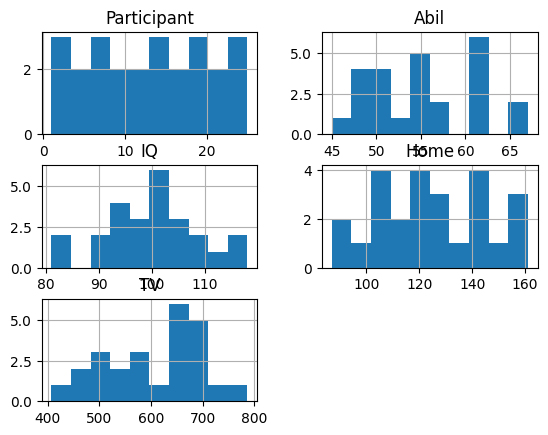

In [161]:
# Q1c (code):
# Check data distribution

# create the histogram of data to check the distribution directly and quikly
df_mh.hist()

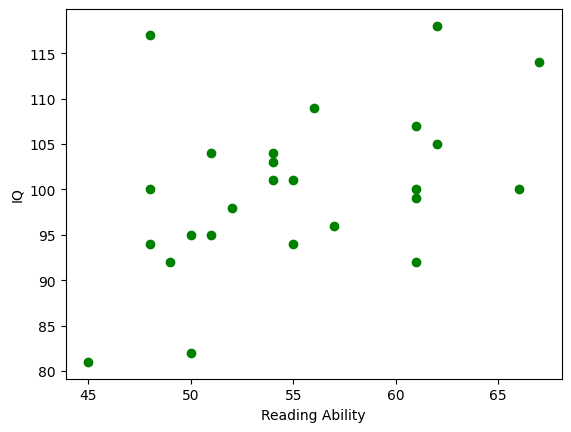

In [162]:
# Q1d (code):
# Scatter plot

# define the variable of reading ability
Abil = df_mh["Abil"]
# define the variable of IQ
IQ = df_mh["IQ"]

# set the plot variables and the point color as green
plt.scatter(Abil, IQ, c="g")
# set the label of y-axis
plt.ylabel("IQ")
# set the label of x-axis
plt.xlabel("Reading Ability")
# show the scatter plot
plt.show()



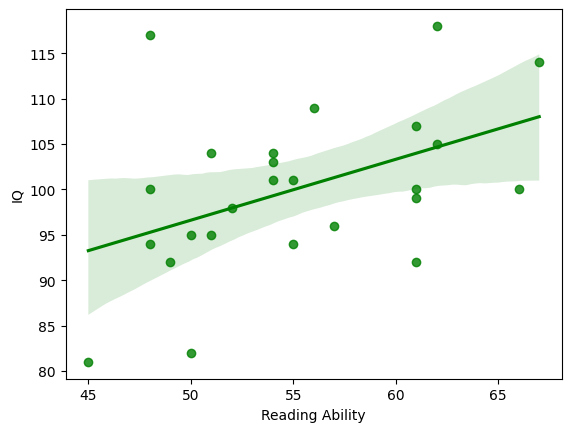

In [163]:
# Q1e (code):
# Correlation line

# draw the correlation line between two variables
plot_corr_sns=sns.regplot(x="Abil", y="IQ", color="g", data=df_mh)

# set the label of y-axis
plt.ylabel("IQ")
# set the label of x-axis
plt.xlabel("Reading Ability")
# show the scatter plot
plt.show()



**Question 2**:

a. Which correlation coefficient test can we use, Pearson or Spearman? Briefly explian why based on the results of Question 1.

b. Conduct a correlation coefficient test.

c. Interpret the result (direction and strength of the association between the two varibles)

In [164]:
# Q2a (answer with words):
'''we can use Pearson coefficient test, because the data is continuous, normally distributed, and exhibits a linear relationship between two variables.'''

'we can use Pearson coefficient test, because the data is continuous, normally distributed, and exhibits a linear relationship between two variables.'

In [165]:
# Q2b (code):

# use Pingouin corr() function to conduct the Pearson correlation coefficient test
corr_Pear= pg.corr(Abil, IQ)

# print the test result
print (corr_Pear)

          n        r         CI95%     p-val   BF10     power
pearson  25  0.45117  [0.07, 0.72]  0.023593  2.804  0.640299


In [166]:
# Q2c (answer with words):



''' r=0.45117.The correlation coefficient is 0.45117, it is positive . So the correlation directionality is positive. When the value of one variable increases,the value of another one will also increase. The number is not very closed to the 1 or 0, so the correlation between reading ability and IQ is not weak or strong, but in a medium degree. '''




' r=0.45117.The correlation coefficient is 0.45117, it is positive . So the correlation directionality is positive. When the value of one variable increases,the value of another one will also increase. The number is not very closed to the 1 or 0, so the correlation between reading ability and IQ is not weak or strong, but in a medium degree. '

## Task 2. Chi-square Test
We will continue to use the data example from Task 1.

We want to explore whether there are significant differences in the amount of time spent reading at home per week (Home) among people with different reading abilities (Reading Ability). Therefore, we will divide the reading ability of all participants into two groups. The first group is those with low reading ability (Reading Ability at or below the rounded average), and the second group is those with high reading ability (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Abil".


Similarly, the reading time is divided into two different scenarios: the first scenario is infrequent reading (Home at or below the rounded average), and the other is frequent reading (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Home".


Then, construct a Contingency Matrix and perform a Chi-square test.

**Question 3**:

a. Please state the null hypothesis (H0) and alternative hypothesis (H1) for this Chi-square test.

b. Based on the task description, add new columns “Rank_Abil” and "Rank_Home" to the dataframe df_mh.

c. Construct a Contingency Matrix.

d. Perform a Chi-square test.

e. Interpret the results of the Chi-square test (answer in text).

In [167]:
# Q3a (answer in words):
''' H1:People with high reading abilities spend more time reading at home per week than those with low reading abilities .
H0:There is no difference in the amount of time spent reading at home per week among people with different reading abilities .'''


' H1:People with high reading abilities spend more time reading at home per week than those with low reading abilities .\nH0:There is no difference in the amount of time spent reading at home per week among people with different reading abilities .'

In [168]:
# Q3b (code):
# Import necessary libraries
import pandas as pd  ##used for data organization and manipulation
from scipy.stats import chi2_contingency ##used for conducting Chi-square test

# Define the rounded average for Reading Ability and Home
avg_Abil = round(df_mh['Abil'].mean())
avg_Home = round(df_mh['Home'].mean())


# Create the Rank_Abil column
# Define functions for rank condition, if the value <= average value, then the rank is low, else, its high
def rank_abil(value):
    if value <= avg_Abil:
        return 'Low'
    else:
        return 'High'
# create the column according to the condition of the value of reading abilities
df_mh['Rank_Abil'] = df_mh['Abil'].apply(rank_abil)


# Create the Rank_Home column
# Define functions for rank condition, if the value <= average value, then the rank is infrequent, else it is frequent
def rank_home(value):
    if value <= avg_Home:
        return 'Infrequent'
    else:
        return 'Frequent'
# create the column according to the condition of the value of time spent on reading
df_mh['Rank_Home'] = df_mh['Home'].apply(rank_home)





In [169]:
# Q3c (code):

# Construct Contingency Matrix

# create the dataframe separately of each variable for contingency martrix
high_frequent = df_mh[(df_mh['Rank_Abil'] == "High") & (df_mh['Rank_Home'] == 'Frequent')]
high_infrequent = df_mh[(df_mh['Rank_Abil'] == "High") & (df_mh['Rank_Home'] == 'Infrequent')]
low_frequent = df_mh[(df_mh['Rank_Abil'] == "Low") & (df_mh['Rank_Home'] == 'Frequent')]
low_infrequent = df_mh[(df_mh['Rank_Abil'] == "Low") & (df_mh['Rank_Home'] == 'Infrequent')]

# create a list of values for contingency martrix
data4contingency = []
# obtain the row count for each dataframe of variables for contingency martrix, which is the number(frequency) of people meeting the specific conditions
# then store these value obtained into the list created for contingency martrix
data4contingency.append(len(high_frequent))
data4contingency.append(len(high_infrequent))
data4contingency.append(len(low_frequent))
data4contingency.append(len(low_infrequent))

# print the values of high_frequent, high_infrequent, low_frequent and low_infrequent
print('The values:')
print(data4contingency)

# transform the list in a contingency matrix
data_cm = np.array(data4contingency).reshape(2,-1)

# displat the contingency matrix
print('The contingency matrix')
print(data_cm)

The values:
[8, 2, 3, 12]
The contingency matrix
[[ 8  2]
 [ 3 12]]


In [170]:
# Q3d (code):
# Perform the Chi-square test
chi2, p_value, degree_of_freedom, expected_frequencies= chi2_contingency(data_cm)
# print the Chi-square value and the p value
print(chi2, p_value)

# print the expected frequencies of the chi square test
print('These are the expected frequencies')
print(expected_frequencies)

# print the p value
if p_value < 0.05:
    print("The observed differences are statiscally significant - H0 is rejected")
else:
    print("The observed differences are not statiscally significant - H1 is rejected")

6.500270562770561 0.010785807794066234
These are the expected frequencies
[[4.4 5.6]
 [6.6 8.4]]
The observed differences are statiscally significant - H0 is rejected


In [171]:
# Q3e (answer in words):
'''p value < 0.05，null hypothesis is rejected. The chi2 value is 6.5, which is large. This suggests the observed data is significantly different from the expected. The expected data exsits given the reading ability and the reading time have no assciation. So the H0 is rejected here, and there is a significant association between reading time per week and reading abilities.'''



'p value < 0.05，null hypothesis is rejected. The chi2 value is 6.5, which is large. This suggests the observed data is significantly different from the expected. The expected data exsits given the reading ability and the reading time have no assciation. So the H0 is rejected here, and there is a significant association between reading time per week and reading abilities.'

## Task 3. Two-sample t-test
As we discussed on Week 3, Two-sample designs are very useful when we want to know whether there is a difference between groups on a particular variable.

In this assignment, you will be guided to replicate the Experiment 4 (p. 887-888) from the paper below, focusing on understanding the data through descriptive statistics, visualizing distributions, testing assumptions (normality and variance homogeneity), and finally performing the independent t-test.

Schroeder, J. and Epley, N. (2015). The sound of intellect: Speech reveals a thoughtful mind, increasing a job candidate's appeal. Psychological Science, 26, 277--891.


As we explained during Week 3 lecture, there are different types of two-sample designs depending on whether or not the two groups are independent (e.g., different participants in different conditions) or not (e.g., same participants in different conditions). In this course we focus on independent samples, which typically means that the observations in the two groups are unrelated - usually meaning different people. But in real practice you will need to go through similar procedures to determine which is the proper statistical test to use.




### Background of data: Speech as indicator of intellect
To recap on Experiment 4, 39 professional recruiters from Fortune 500 companies evaluated job pitches of M.B.A. candidates (Masters in Business Administration) from the University of Chicago Booth School of Business. The methods and results appear on pages 887--889 of the article if you want to look at them specifically for more details.

###Step 1: Analyze the demographics of evaluators from the provided dataset

**Instructions:**

1. Load the necessary libraries (pandas, scipy, numpy, matplotlib.pyplot, seaborn) and explain why you need them ("#used for ...").

2. Read the evaluators.csv file into a DataFrame.

3. Calculate the mean and standard deviation of the age of the evaluators, handling missing values appropriately.

4. Count how many male and female evaluators were in the study.

**Question 4:**

a. What was the mean age of the evaluators?
What was the standard deviation of the age of the evaluators?

b. How many participants were female and how many participants were male?


In [172]:

import pandas as pd # used for data orgnization and manipulation
from scipy import stats #used for data statistcs
import numpy as np #used for numerical processing of data
import matplotlib.pyplot as plt #used for plot display
import seaborn as sns #used for graph display

# Load the data using pandas
df_evaluators = pd.read_csv('evaluators.csv')

# display the first five rows of the dataframe
df_evaluators.head()


,eval_id,condition,age,sex
0,1,listened,29.0,2.0
1,2,listened,27.0,2.0
2,3,listened,27.0,2.0
3,4,read,40.0,2.0
4,5,read,32.0,2.0


In [173]:
# Q4a (code):
# Calculate mean and standard deviation for age
mean = df_evaluators['age'].mean()
std = df_evaluators['age'].std()
# print the results
print("mean for age:", mean)
print("deviation for age:", std)

mean for age: 30.852941176470587
deviation for age: 6.238358141327351


In [174]:
# Q4b (code)
# Count male and female evaluators
# In the 'sex' column: 1 represents males and 2 represents females

# define how to count sex in the datadframe using 'groupby'
sex_counts = df_evaluators.groupby('sex').size()

# count the sex separately
count_male = sex_counts.get(1)
count_female = sex_counts.get(2)

# print the results
print(f"there are {count_male} male evaluators, there are {count_female} female evaluators")





there are 4 male evaluators, there are 30 female evaluators


###Step 2: Calculate overall intellect ratings from evaluators and prepare a combined dataset for analysis

We are now going to calculate an overall intellect rating given by each evaluator. To break that down a bit, we are going to calculate how intellectual the evaluators (the raters) thought candidates were overall, depending on whether the evaluators read or listened to the candidates' resume pitches. This is calculated by averaging the ratings of competent, thoughtful and intelligent for each evaluator held within ratings.csv.

Note: We are not looking at ratings to individual candidates; we are looking at overall ratings for each evaluator. This is a bit confusing but makes sense if you stop to think about it a little. You can think about it in terms of "do raters rate differently depending on whether they read or listen to a resume pitch".
We will then combine the overall intellect rating with the overall impression ratings and overall hire ratings for each evaluator, all ready found in ratings.csv. In the end we will have a new new dataframe named "ratings2" - which has the below structure:

**eval_id** shows the evaluator ID. Each evaluator has a different ID. So all the 1's are the same evaluator.

**Category** shows the scale that they were rating on - intellect, hire, impression

**Rating** shows the overall rating given by that evaluator on a given scale.

**condition** shows whether that evaluator listened to (e.g., evaluators 1, 2 and 3), or read (e.g., evaluator 4) the resume.


**Instructions:**

1. Load the ratings.csv file.

2. Filter and calculate the mean intellect rating for each evaluator.

3. Combine this with overall impression and hire ratings to create a new DataFrame named "rating2".

4. Merge this DataFrame with the evaluator demographics.

**Question 5**:

Print the head of "rating2".


In [175]:
# Load ratings data
df_ratings = pd.read_csv('ratings.csv')
df_ratings.head()


,eval_id,Category,Rating
0,1,competent,6.0
1,1,thoughtful,6.0
2,1,intelligent,6.0
3,1,impression,7.0
4,1,hire,6.0


In [176]:
# Q5 (code):
# Filter the ratings DataFrame to include only 'thoughtful', 'competent', and 'intelligent' categories
int_df = df_ratings[(df_ratings['Category'] == 'thoughtful') | (df_ratings['Category'] == 'competent')|(df_ratings['Category'] == 'intelligent')]

# Calculate the mean intellect rating for each evaluator
# Group by 'eval_id' and calculate mean, then reset the index to convert groupby object back to DataFrame
intellect_mean= int_df.groupby('eval_id')['Rating'].mean().reset_index()


# Add a 'Category' column with the value 'intellect' for these rows
intellect_mean['Category'] = 'intellect'

# Create a DataFrame for 'impression' and 'hire' ratings
other_ratings = df_ratings[(df_ratings['Category'] == 'impression') | (df_ratings['Category'] == 'hire')]


# Combine the DataFrames to create 'ratings2'
# Concatenate the 'intellect_mean' DataFrame with the 'other_ratings' DataFrame
ratings2 = pd.concat([intellect_mean, other_ratings], ignore_index=True)


# Join 'ratings2' with the 'df_evaluators' DataFrame to add the 'condition' column
ratings2_with_condition = pd.merge(ratings2, df_evaluators[['eval_id', 'condition']], on='eval_id', how='left')


# Select only the necessary columns as per the structure required
final_ratings = ratings2_with_condition[['eval_id', 'Category', 'Rating', 'condition']]


# Arrange by 'eval_id' and 'Category'
ratings2 = final_ratings.sort_values(by=['eval_id', 'Category'])

# Display the first few rows of the final 'ratings2' DataFrame to verify
ratings2.head()


,eval_id,Category,Rating,condition
40,1,hire,6.000000,listened
39,1,impression,7.000000,listened
0,1,intellect,6.000000,listened
42,2,hire,4.000000,listened
41,2,impression,4.666667,listened


###Step 3: Perform descriptive and inferential statistical analyses, including testing assumptions and conducting independent t-tests.

We are going to run the t-tests for Intellect, Hire and Impression; each time comparing evaluators overall ratings for the listened group versus overall ratings for the read group to see if there was a significant difference between the two conditions: i.e., did the evaluators who listened to pitches give a significant higher or lower rating than evaluators that read pitches?

**Question 6**:

a. In terms of hypotheses, how can we phrase the hypothesis?

b. Which t-test should we choose, one-tail or two-tail? And explian why.

c. What are the independent variable and the dependent variable here?



In [177]:
# Q6a (answer in words):
# Null hypothesis:
# Alternative hypothesis:
'''null hypothesis: There is no significant difference in the rating given by evaluators who listened to pitches and evaluators who read the pitches. hypothesis: There is a significant difference(higher or lower) in the  rating given by evaluators who listened to pitches compared to evaluators who read the pitches.'''


'null hypothesis: There is no significant difference in the rating given by evaluators who listened to pitches and evaluators who read the pitches. hypothesis: There is a significant difference(higher or lower) in the  rating given by evaluators who listened to pitches compared to evaluators who read the pitches.'

In [178]:
# Q6b (answer in words):
# Which t-test should we choose, one-tail or two-tail? Explian why.
'''two-tail，because the alternative hypothesis is non-directional'''

'two-tail，because the alternative hypothesis is non-directional'

In [179]:
# Q6c (answer in words):
# What are the independent variable and the dependent variable here?
''' the independent variable: condition; the dependent variable: rating'''

' the independent variable: condition; the dependent variable: rating'


To clarify, we are going to run three between-subjects t-tests in total; one for intellect ratings; one for hire ratings; one for impression ratings.

**Instructions:**

1. Descriptive analysis of the ratings.

2. Test for normal distribution (Shapiro-Wilk test) and homogeneity of variances (Levene's test) for the intellect, impression, and hire ratings.

3. Conduct independent t-tests comparing intellect, impression, and hire ratings between conditions (listened vs. read).

Hints: three T-tests need to be performed.

**Question 7**:

a: Print the test results.

b: Interpret the results of the above descriptive statistics, Shapiro-Wilk test, Levene's test, and independent t-tests. Explian why we use these tests and how we made our decisions based on the test result.

In [190]:
##Q7a (code):

from scipy.stats import shapiro, levene, ttest_ind # used for conducting statistic analysis

# Define a function of the descriptive analysis and normal distribution test for single category value
def test(dataframe, category_value):

    #print the title of the analysis and test conducted
    print('analysis for', category_value)
    # Descriptive analysis of the ratings
    # filter subdataframe of the category tested using groupby
    value_df = dataframe.groupby('Category').get_group(category_value)
    # Descriptive statistics for ratings in this category, and print the results
    print("the descriptive analysis of ratings:" )
    print(value_df.describe())


    # Test for normal distribution (Shapiro-Wilk test)
    # conduct Shapiro-Wilk test to the ratings
    score1, p_value1 = shapiro(value_df['Rating'])
    # define the result with p value
    if p_value1 > 0.05:
        shapiro_result = "ratings are normally distributed"
    else:
        shapiro_result = "ratings are not normally distributed"
    # print result of both normal distribution tests
    print(shapiro_result)

    # Test for homogeneity of variances (Levene's test)
    # create the dataframe for categories other than the tested category in this fuction
    other_df = dataframe[dataframe['Category'] != category_value]
    # create a list to store rating lists in every other categories
    all_ratings = [other_df[other_df['Category'] == cat]['Rating'] for cat in other_df['Category'].unique()]
    # add the rating list of the tested category
    all_ratings.append(value_df['Rating'])
    # conduct the Levene's test
    stat2, p_val2 = levene(*all_ratings)
    # define the result with p value
    if p_val2 < 0.05:
        levene_result = "Levene's test is significant - Don't use t test"
    else:
        levene_result = "Levene's test is not significant - proceed"
    # print result of Levene's test
    print(levene_result)

In [192]:
#Define a function for Independent t-tests for single category

def t_test(dataframe, category_value):

    print ("Independent t-tests of ", category_value)
    # filter subdataframe of intellect ratings using groupby
    value_df = ratings2.groupby('Category').get_group(category_value)
    # filter subdataframe of both conditions
    ratings_listen = value_df.groupby('condition').get_group('listened')
    ratings_read = value_df.groupby('condition').get_group('read')
    #Conduct independent t-tests
    score4, p_val4 = stats.ttest_ind(ratings_listen['Rating'],ratings_read['Rating'])
    # define the result with p value
    if p_val4 < 0.05:
      ttest_result = "Difference is statistically significant - reject H0, confirm H1"
    else:
      ttest_result = "Difference is NOT statistically significant - reject H1, confirm H0"
    #print result of Levene's test
    print(ttest_result)

In [193]:
# desciptive analysis and normal distribution test for intellect category

test(ratings2,'intellect')

analysis for intellect
the descriptive analysis of ratings:
         eval_id     Rating
count  39.000000  39.000000
mean   20.000000   4.717949
std    11.401754   2.000787
min     1.000000   0.666667
25%    10.500000   3.500000
50%    20.000000   5.000000
75%    29.500000   6.000000
max    39.000000   9.000000
ratings are normally distributed
Levene's test is not significant - proceed


In [194]:
# Independent t-test of intellect
t_test(ratings2,'intellect')

Independent t-tests of  intellect
Difference is statistically significant - reject H0, confirm H1


In [195]:
# desciptive analysis and normal distribution test for impression category

test(ratings2,'impression')

analysis for impression
the descriptive analysis of ratings:
         eval_id     Rating
count  39.000000  39.000000
mean   20.000000   5.094017
std    11.401754   2.254234
min     1.000000   0.333333
25%    10.500000   3.666667
50%    20.000000   5.333333
75%    29.500000   7.000000
max    39.000000   8.666667
ratings are normally distributed
Levene's test is not significant - proceed


In [196]:
# Independent t-test of impression
t_test(ratings2,'impression')

Independent t-tests of  impression
Difference is statistically significant - reject H0, confirm H1


In [197]:
# desciptive analysis and normal distribution test for hire category

test(ratings2,'hire')

analysis for hire
the descriptive analysis of ratings:
         eval_id     Rating
count  39.000000  39.000000
mean   20.000000   3.871795
std    11.401754   2.330343
min     1.000000   0.000000
25%    10.500000   2.000000
50%    20.000000   4.000000
75%    29.500000   5.000000
max    39.000000   8.000000
ratings are not normally distributed
Levene's test is not significant - proceed


In [200]:
#Q7b (answer in words):

''' The descriptive analysis provides simple statistic results for central tendency and distribution situation of data.  Results of Levene tests shows if there is equal variances between samples in different category groups. For the Levene's test, the results are all not significant, this means the assumption of homogeneity of variances is met， the t-test is suggested for every category. Results of Shapiro-Wilk tests suggest if t-test should be used.  For the intellect and impression categories, the results of Shapiro-Wilk test are both positive, the data of them are both normally distributed. So the t-test should be conducted in them. Results of t-tests in these two are both "Difference is statistically significant" , which means there is a significant difference in the rating given by evaluators who listened to pitches compared to those who read for ratings of intellect and impression. However, the result in hire shows data in this category is not normally distributed, so the t-test for hire should not be used.'''



' The descriptive analysis provides simple statistic results for central tendency and distribution situation of data.  Results of Levene tests shows if there is equal variances between samples in different category groups. For the Levene\'s test, the results are all not significant, this means the assumption of homogeneity of variances is met， the t-test is suggested for every category. Results of Shapiro-Wilk tests suggest if t-test should be used.  For the intellect and impression categories, the results of Shapiro-Wilk test are both positive, the data of them are both normally distributed. So the t-test should be conducted in them. Results of t-tests in these two are both "Difference is statistically significant" , which means there is a significant difference in the rating given by evaluators who listened to pitches compared to those who read for ratings of intellect and impression. However, the result in hire shows data in this category is not normally distributed, so the t-test f